## Numpy個人的tips

numpyもデータ分析には欠かせないツールの一つです。個人的な備忘録としてメモを残しておきます。詳細は
- [公式ページ](https://docs.scipy.org/doc/numpy/reference/)
を参照してください。

### 目次
- [1. 基本的な演算](/article/library/numpy/base/)
- [2. 三角関数](/article/library/numpy/trigonometric/)
- [3. 指数・対数](/article/library/numpy/explog/)
- [4. 統計関数](/article/library/numpy/statistics/)
- [5. 線形代数](/article/library/numpy/matrix/)
- [6. サンプリング](/article/library/numpy/sampling/)
- [7. その他](/article/library/numpy/misc/) <= 今ここ

### github
- githubのjupyter notebook形式のファイルは[こちら](https://github.com/hiroshi0530/wa/blob/master/src/numpy/matrix/matrix_nb.ipynb)

### numpy 読み込み
筆者の環境とimportの方法は以下の通りです。

In [1]:
!sw_vers

ProductName:	Mac OS X
ProductVersion:	10.14.6
BuildVersion:	18G2022


In [2]:
!python -V

Python 3.7.3


In [3]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

import numpy as np

np.__version__

'1.16.2'

## 便利関数

### np.sqrt(x)
平方根を計算します。

In [4]:
np.sqrt(4)

2.0

### np.cbrt(x)
三乗根を計算します。

In [5]:
np.cbrt(8)

2.0

### np.square(x)
2乗を計算します。

In [6]:
np.square(2)

4

### np.absolute(x)
絶対値を計算します。複素数に対応しています。

In [7]:
print(np.absolute(-4))
print(np.absolute([1,-2,-4]))
print(np.absolute(complex(1,1))) # => sqrt(2) 

4
[1 2 4]
1.4142135623730951


### np.convolve(x,y)
畳み込みを計算します。

In [8]:
a = np.array([1,2,3])
b = np.array([0,1.5,2])

print(np.convolve(a,b, mode='full')) # defalut mode = full
print(np.convolve(a,b, mode='same'))
print(np.convolve(a,b, mode='valid'))

[0.  1.5 5.  8.5 6. ]
[1.5 5.  8.5]
[5.]


### np.diff(a,N)
要素間の差分を取ります。離散値の微分と同じような作用をします。

$$
d1_a[x] = a[x+1] - a[x]
$$

Nに整数を代入することで、N階微分の値を求める事ができます。

$$
d2_a[x] = d1_a[x+1] - d1_a[x]
$$


In [168]:
a = np.random.randint(10,size=10)
print('a      : ', a)
print('1次微分 : ', np.diff(a))
print('2次微分 : ', np.diff(a, 2))

a      :  [9 8 9 8 9 0 6 3 7 8]
1次微分 :  [-1  1 -1  1 -9  6 -3  4  1]
2次微分 :  [  2  -2   2 -10  15  -9   7  -3]


### np.cumsum(a)
要素の足し合わせになります。概念としては離散値の積分に近いです。
$$
s_a[x] = \sum_{i=0}^{x}a[x]
$$

In [173]:
a = np.random.randint(10,size=10)
print('a   : ', a)
print('積分 : ', np.cumsum(a))

a      :  [2 5 2 8 5 7 4 3 2 8]
cumsum :  [ 2  7  9 17 22 29 33 36 38 46]


### np.heaviside(x,c)

ヘヴィサイドの階段関数です。
<div>

$$
H_c(x)=
{
  \begin{cases}
  1\ (x \gt 0)\\\\
  c\ (x = 0)\\\\
  0\ (x \lt 0)
  \end{cases}
}
$$
</div>

データ分析などではそれほど使う機会はありませんが、一応記載しておきます。
```python
np.heaviside(a, 10)
```
と表記し、$c=10$に対応します。

In [9]:
a = [i for i in range(-2,3)]
print(a)
print(np.heaviside(a, 10))

[-2, -1, 0, 1, 2]
[ 0.  0. 10.  1.  1.]


### np.interp(x',x,y)
線形補間した値を返します。

```python
x = [0,1,2]
y = [2,100,50]

x1 = [0.5, 1.8]
y1 = np.interp(x1, x,y)
```

このように定義することで、$(x,y) = (0,2), (1,100)$を結ぶ直線の$x=0.5$の値と、$(x,y) = (1,100),(2,50)$を結ぶ直線の$x=1.8$の値を求める事ができます。以下の様にグラフに書くとわかりやすいかと思います。


x1 :  [0.5, 1.8]
y1 :  [51. 60.]


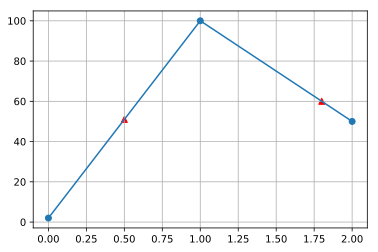

In [10]:
import matplotlib.pyplot as plt

x = [0,1,2]
y = [2,100,50]

plt.grid()
plt.plot(x,y,marker='o')

x1 = [0.5, 1.8]
y1 = np.interp(x1, x,y)

print('x1 : ', x1)
print('y1 : ', y1)
plt.scatter(x1,y1,marker='^',c='red')

## 配列の操作

### ndarray.reshape(N,M,･･･)
配列の形状を変更します。配列のトータルのサイズは変更前後で一致する必要があります。

サイズが12の一次元配列を3x4の二次元配列に変換します。

In [26]:
a = np.arange(12)
b = a.reshape(3,4)

print('before shape : ',a.shape)
print('after shape  : ',b.shape)

before shape :  (12,)
after shape  :  (3, 4)


### np.tile(a,(N,M,･･･)
aをタイル上に配置します。例を見た方がわかりやすいと思います。

In [163]:
a = np.arange(5)

np.tile(a,(2,1))

array([[0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4]])

### ndarray.flatten()
二次以上の配列を一次元の配列に変換します。copyを作成し、一次元に平坦化し、そのオブジェクトを返します。

In [128]:
a = np.arange(12).reshape(3,4)
b = a.flatten()

print('a : ',a)
print('b : ',b)

a :  [[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
b :  [ 0  1  2  3  4  5  6  7  8  9 10 11]


### ndarray.ravel()
二次以上の配列を一次元の配列に変換します。copyを作成せず、一次元に平坦化します。一般的にflattenよりハードウェアに対する負荷が少ないのでこちらを利用する事が推奨されています。

In [129]:
a = np.arange(12).reshape(3,4)
b = a.ravel()

print('a : ',a)
print('b : ',b)

a :  [[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
b :  [ 0  1  2  3  4  5  6  7  8  9 10 11]


In [55]:
a = np.array([1,2,3])
a = [1,2,3]
b = a[:]

b[0] = 100

print(id(a))
print(id(b))
print(id(a[0]))
print(id(b[0]))
print(a)
print(b)

print(type(a))
print(type(a[:]))
print(id(a))
print(id(a[:]))

4860347976
4860219976
4553659808
4553662976
[1, 2, 3]
[100, 2, 3]
<class 'list'>
<class 'list'>
4860347976
4854928776


### ndarray.flatten と ndarray.ravelの違い

viewの場合は、元の配列が変更されたら、それを参照している配列も変更されます。

#### viewとcopy

一般にndarray型の代入はアドレスがコピーされます。よって、参照元が変更されると、参照先も変更されます。また、メモリアドレスも一致し、オブジェクトが使用しているメモリサイズも同一です。

また、ndarray型にはbaseというメソッドがありますが、これはNoneとなっています。baseについて後述します。

In [148]:
import sys

a = np.arange(10000)
b = a

a[1] = 100

print('a      = ', a)
print('b      = ', b)
print('id(a)  = ', id(a))
print('id(b)  = ', id(b))
print('a mem  = ', sys.getsizeof(a))
print('b mem  = ', sys.getsizeof(b))
print('a base = ', a.base)
print('b base = ', b.base)

a     =  [   0  100    2 ... 9997 9998 9999]
b     =  [   0  100    2 ... 9997 9998 9999]
id(a) =  4861020400
id(b) =  4861020400
a mem =  80096
b mem =  80096
None
None


In [156]:
import sys

a = np.arange(10000)
b = a.copy()

a[1] = 100

print('a      = ', a)
print('b      = ', b)
print('id(a)  = ', id(a))
print('id(b)  = ', id(b))
print('a mem  = ', sys.getsizeof(a))
print('b mem  = ', sys.getsizeof(b))
print('a base = ', a.base)
print('b base = ', b.base)

a      =  [   0  100    2 ... 9997 9998 9999]
b      =  [   0    1    2 ... 9997 9998 9999]
id(a)  =  4861021120
id(b)  =  4860545504
a mem  =  80096
b mem  =  80096
a base =  None
b base =  None


次にbをaの先頭から10個の配列をスライスして作成してみます。そうすると、メモリアドレスが異なる別のオブジェクトが作成されます。しかし、`a[1]=100`とすると、bも変更されます。よって、bは別のオブジェクトであるが、aを参照しているオブジェクトである事がわかります。


また、サイズも96バイトと、かなり小さいです。dtypeはint64なので、スライスされた値がそのまま格納されているのなら、どんなに少なくても8バイトx20=160バイトは欲しいのですが、それ以下になっています。よって、aのメモリアドレスが格納されていると考えて良いかと思います。

In [154]:
import sys

a = np.arange(10000)
b = a[:20]

a[1] = 100

print('a     = ', a)
print('b     = ', b)
print('id(a) = ', id(a))
print('id(b) = ', id(b))
print('a mem = ', sys.getsizeof(a))
print('b mem = ', sys.getsizeof(b))
print('a base = ', a.base)
print('b base = ', b.base)

a     =  [   0  100    2 ... 9997 9998 9999]
b     =  [  0 100   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19]
id(a) =  4861019200
id(b) =  4860939920
a mem =  80096
b mem =  96
a base =  None
b base =  [   0  100    2 ... 9997 9998 9999]


reshapeについてもやってみます。

In [155]:
import sys

a = np.arange(10000)
b = a.reshape(100,100)

a[1] = 100

print('a     = ', a)
print('b     = ', b)
print('id(a) = ', id(a))
print('id(b) = ', id(b))
print('a mem = ', sys.getsizeof(a))
print('b mem = ', sys.getsizeof(b))
print('a base = ', a.base)
print('b base = ', b.base)

a     =  [   0  100    2 ... 9997 9998 9999]
b     =  [[   0  100    2 ...   97   98   99]
 [ 100  101  102 ...  197  198  199]
 [ 200  201  202 ...  297  298  299]
 ...
 [9700 9701 9702 ... 9797 9798 9799]
 [9800 9801 9802 ... 9897 9898 9899]
 [9900 9901 9902 ... 9997 9998 9999]]
id(a) =  4861021520
id(b) =  4860545104
a mem =  80096
b mem =  112
a base =  None
b base =  [   0  100    2 ... 9997 9998 9999]


以下にflattenとravelのbaseと使用メモリの差を示します。上述したとおり、flattenにbaseとなる配列は存在せず、ravelの場合は元の配列がbaseとなります。また、flattenはcopyするため、オブジェクトがメモリ上に占有するサイズは元のオブジェクトと同一ですが、ravelの場合は最小限に抑えられています。

この辺は、やや低レベルレイヤーの話ですが、ちゃんと理解しているのとしていないとでは、技術者として大きな差となります。

In [131]:
import sys

a = np.arange(120000,dtype='int64')
b1 = a.reshape(300,400)

for i in [0,1]:
  
  if i == 0:
    print('######## flatten ########')
    b2 = b1.flatten()
  elif i == 1:
    print('######## ravel ########')
    b2 = b1.ravel()
    
  print('id')
  print('a  : ', id(a))
  print('b1 : ', id(b1))
  print('b2 : ', id(b2))
  print('')

  print('base')
  print('b1 : ', b1.base)
  print('b2 : ', b2.base)
  print('')
  
  print('オブジェクトの使用メモリ')
  print('a  : ',sys.getsizeof(a))
  print('b1 : ',sys.getsizeof(b1))
  print('b2 : ',sys.getsizeof(b2))
  print('')


######## flatten ########
id
a  :  4860455472
b1 :  4861036944
b2 :  4861035424

base
b1 :  [     0      1      2 ... 119997 119998 119999]
b2 :  None

オブジェクトの使用メモリ
a  :  960096
b1 :  112
b2 :  960096

######## ravel ########
id
a  :  4860455472
b1 :  4861036944
b2 :  4860431616

base
b1 :  [     0      1      2 ... 119997 119998 119999]
b2 :  [     0      1      2 ... 119997 119998 119999]

オブジェクトの使用メモリ
a  :  960096
b1 :  112
b2 :  96



### np.hstack
ndarray型の連結です。水平(horizontal, axis=1)方向に連結します。割とよく使います。

In [12]:
a = np.array([1,2,3])
b = np.array([4,5,6])

print('a      : ',a)
print('b      : ',b)
print('hstack : ',np.hstack((a,b)))

a      :  [1 2 3]
b      :  [4 5 6]
hstack :  [1 2 3 4 5 6]


結合したい方向の要素サイズが合っていないとエラーが生じます。例えば、
`shape=(1,2)`と`shape=(2,1)`はエラーが生じます。

In [13]:
a = np.array([[1,2]])
b = np.array([[1],[2]])

try:
  print('[error 発生]')
  print('hstack : ',np.hstack((a,b)))
except Exception as e:
  print(e)

[error 発生]
all the input array dimensions except for the concatenation axis must match exactly


### np.vstack
ndarray型の連結です。垂直(vertical, axis=0)方向に連結します。こちらもかなりの頻度で利用します。また、結合したい方向にサイズが合っていないとエラーになります。

In [14]:
a = np.array([1,2,3])
b = np.array([4,5,6])

print('a      : ',a)
print('b      : ',b)
print('hstack : ',np.vstack((a,b)))

a      :  [1 2 3]
b      :  [4 5 6]
hstack :  [[1 2 3]
 [4 5 6]]


## 連番の作成

### np.arange([start, ]stop, [step, ]dtype=None)
連続する整数や等差数列を作成します。引数の考え方はpythonのrange()と同じです。引数の詳細は[numpy.arange](https://docs.scipy.org/doc/numpy/reference/generated/numpy.arange.html)を参照してください。

In [15]:
np.arange(10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [16]:
np.arange(4,12)

array([ 4,  5,  6,  7,  8,  9, 10, 11])

In [17]:
np.arange(3,12,2)

array([ 3,  5,  7,  9, 11])

In [18]:
np.arange(1.5,4.5,0.5)

array([1.5, 2. , 2.5, 3. , 3.5, 4. ])

### np.linspace(start, stop, num=50, endpoint=True, retstep=False, dtype=None, axis=0)
分割したい範囲と分割点数を指定し、等差数列を生成します。とても便利な関数なので至るところで利用します。いちいち分割点がいくらなのか計算しなくていいです。endpoint=Trueでstopを分割点に含み、分割点は、

$$
start, start + \frac{stop - start}{num -1}, start + \frac{stop - start}{num -1} \times 2,start + \frac{stop - start}{num -1} \times 3, \cdots
$$

となります。endpoint=Falseでstopを分割点に含まず、分割点は、

$$
start, start + \frac{stop - start}{num}, start + \frac{stop - start}{num} \times 2,start + \frac{stop - start}{num} \times 3, \cdots
$$

詳細は[numpy.linspace](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linspace.html)を参照してください。

In [19]:
np.linspace(0,1,3)

array([0. , 0.5, 1. ])

In [20]:
np.linspace(0,1,3,endpoint=False)

array([0.        , 0.33333333, 0.66666667])

In [21]:
np.linspace(0,-11,20)

array([  0.        ,  -0.57894737,  -1.15789474,  -1.73684211,
        -2.31578947,  -2.89473684,  -3.47368421,  -4.05263158,
        -4.63157895,  -5.21052632,  -5.78947368,  -6.36842105,
        -6.94736842,  -7.52631579,  -8.10526316,  -8.68421053,
        -9.26315789,  -9.84210526, -10.42105263, -11.        ])

この関数を使うと、グラフなどを簡単に描画できます。

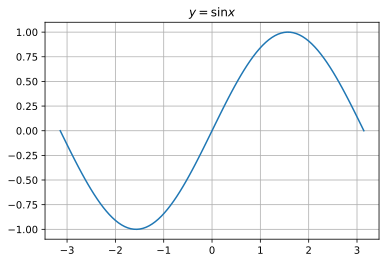

In [22]:
x = np.linspace(- np.pi, np.pi, 100)
y = np.sin(x)

plt.grid()
plt.title('$y=\sin x$')
plt.plot(x,y)